# Live Cattle, Feeder Cattle, Corn Futures

In [2]:
import sys
sys.path.append('../')

import pandas as pd
import src

import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:title={'center':'Live Cattle Futures ($/cwt)'}>

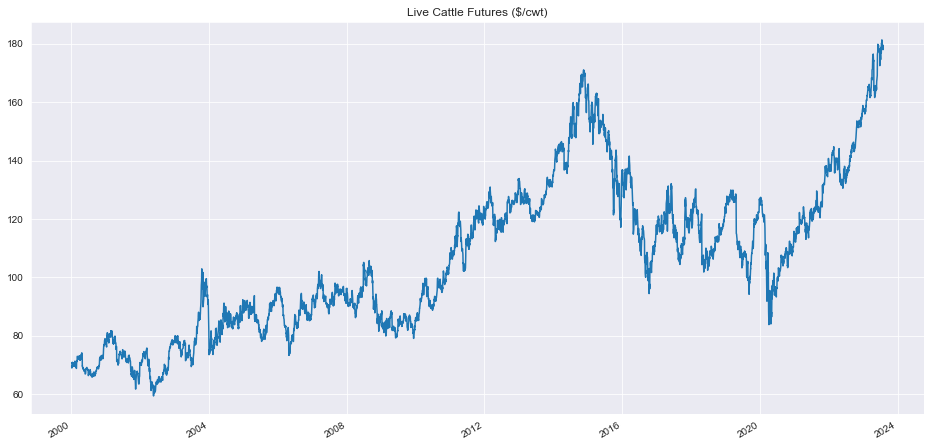

In [3]:
live_cattle_futures = pd.read_csv('csv/live_cattle_futures.csv')
live_cattle_futures = src.clean_tv_data(live_cattle_futures)
live_cattle_futures.plot(title='Live Cattle Futures ($/cwt)')

<AxesSubplot:title={'center':'Adj. Live Cattle Futures (adj.$/cwt)'}>

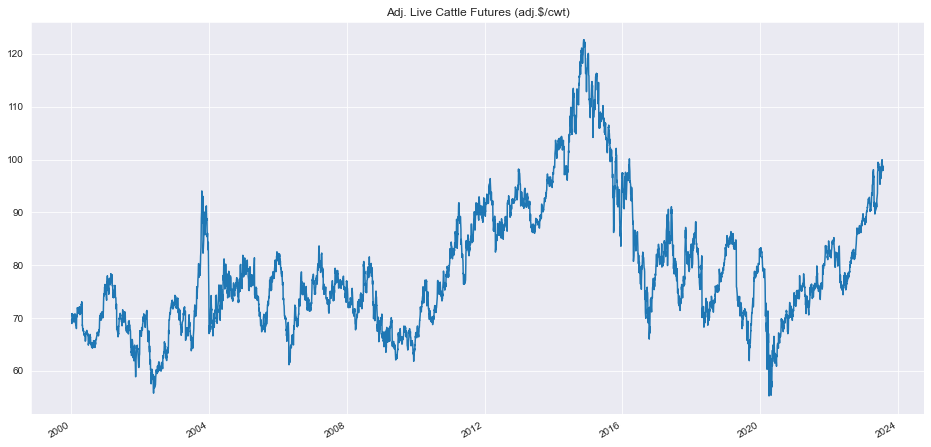

In [4]:
adj_live_cattle_futures = src.adjust_series_cpi(live_cattle_futures)
adj_live_cattle_futures.plot(title='Adj. Live Cattle Futures (adj.$/cwt)')

<AxesSubplot:title={'center':'Feeder Cattle Futures ($/cwt)'}>

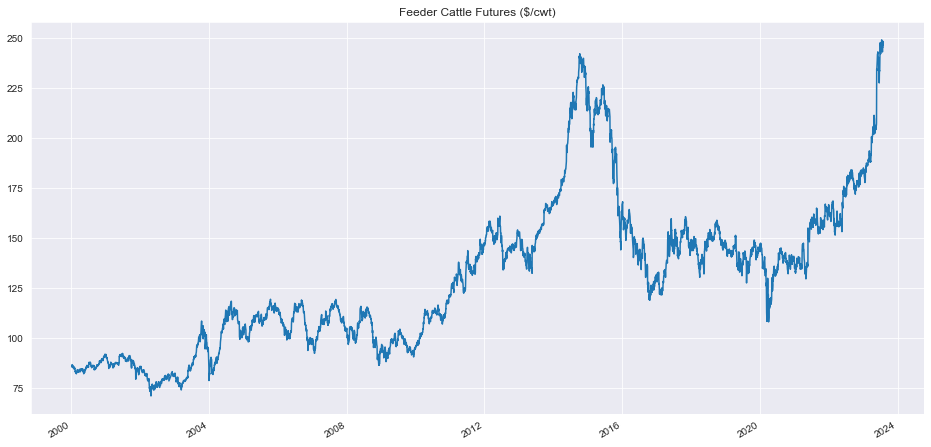

In [5]:
feeder_cattle_futures = pd.read_csv('csv/feeder_cattle_futures.csv')
feeder_cattle_futures = src.clean_tv_data(feeder_cattle_futures)
feeder_cattle_futures.plot(title='Feeder Cattle Futures ($/cwt)')

<AxesSubplot:>

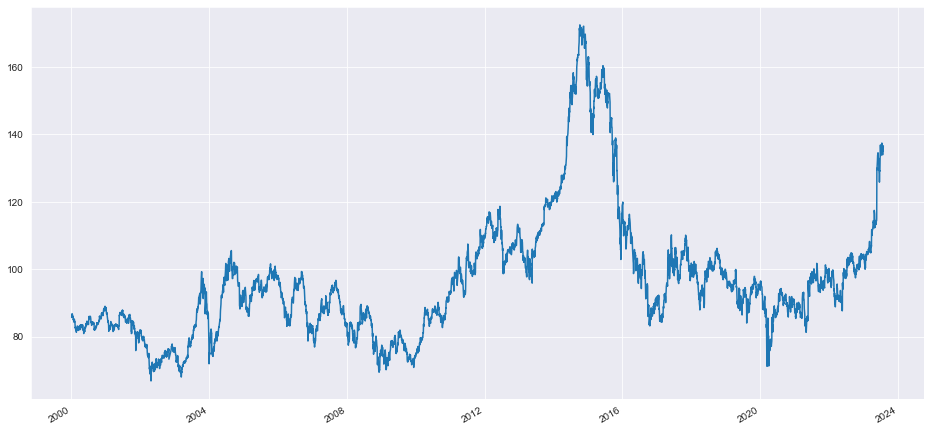

In [6]:
adj_feeder_cattle_futures = src.adjust_series_cpi(feeder_cattle_futures)
adj_feeder_cattle_futures.plot()

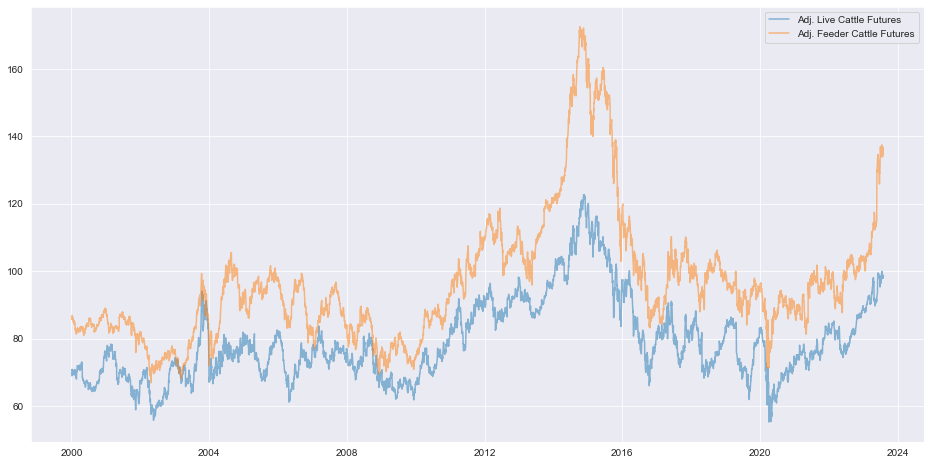

In [7]:
src.lineplot_mult_same_axis(
    adj_live_cattle_futures,
    adj_feeder_cattle_futures,
    'Adj. Live Cattle Futures',
    'Adj. Feeder Cattle Futures'
)

- Feeder cattle inflation adjusted prices are consistently higher than live cattle's per cwt in past +20 years (as expected)

<AxesSubplot:title={'center':'Adjusted Feeder Cattle Futures - Adjusted Live Cattle Futures ($/cwt)'}>

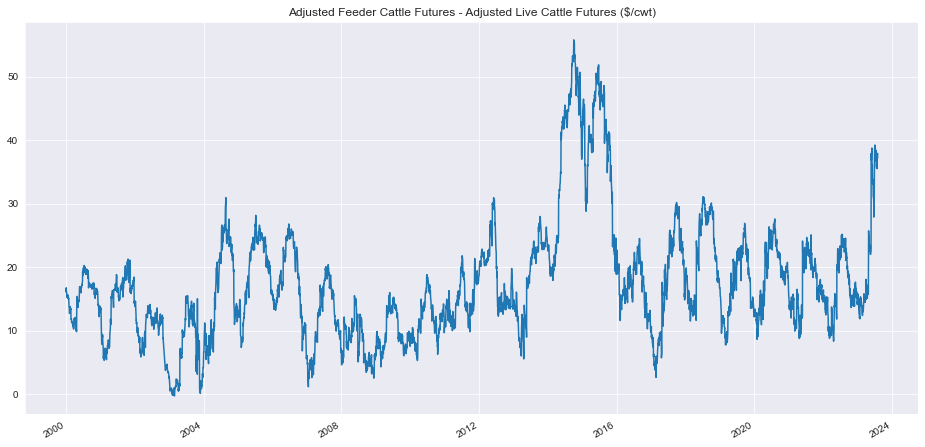

In [8]:
adj_diff = (adj_feeder_cattle_futures - adj_live_cattle_futures).dropna()
adj_diff.plot(title='Adjusted Feeder Cattle Futures - Adjusted Live Cattle Futures ($/cwt)')

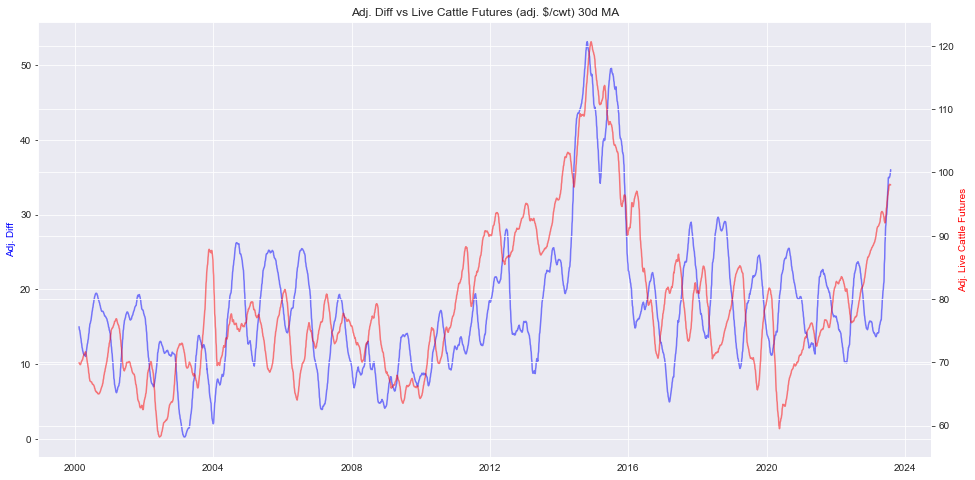

In [10]:
src.lineplot_2_own_axis(
    adj_diff.rolling(30).mean(),
    adj_live_cattle_futures.rolling(30).mean(),
    label1 = 'Adj. Diff',
    label2 = 'Adj. Live Cattle Futures',
    title='Adj. Diff vs Live Cattle Futures (adj. $/cwt) 30d MA'
    )

In [12]:
round(adj_diff.corr(adj_live_cattle_futures),2)

0.55

- The price difference between feeder cattle and live cattle is positively correlated with live cattle futures price
- Look at percentage change difference next

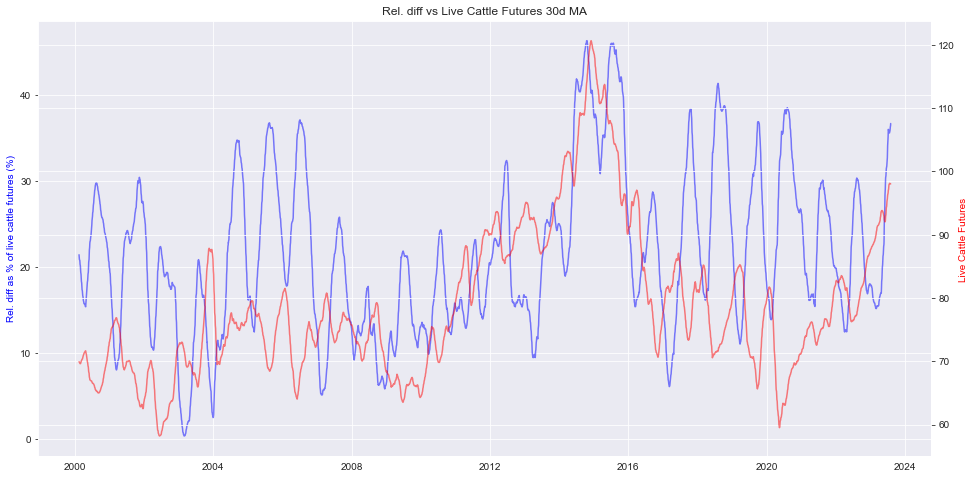

In [14]:
diff_as_pct = (( (adj_feeder_cattle_futures - adj_live_cattle_futures) / adj_live_cattle_futures)*100).dropna()

src.lineplot_2_own_axis(
    diff_as_pct.rolling(30).mean(),
    adj_live_cattle_futures.rolling(30).mean(),
    'Rel. diff as % of live cattle futures (%)',
    'Live Cattle Futures ',
    'Rel. diff vs Live Cattle Futures 30d MA'
    )

In [15]:
round(diff_as_pct.corr(adj_live_cattle_futures),2)

0.23

- The difference between feeder cattle and live cattle as a percentage of the live cattle price is positively correlated with live cattle price
- High price for live cattle --> more money available to bid up feeder cattle proportionally higher (assuming other input costs such as corn/grain stay same)

- Look at corn futures next

In [16]:
corn_futures = pd.read_csv('csv/corn_futures.csv')
corn_futures = src.clean_tv_data(corn_futures)

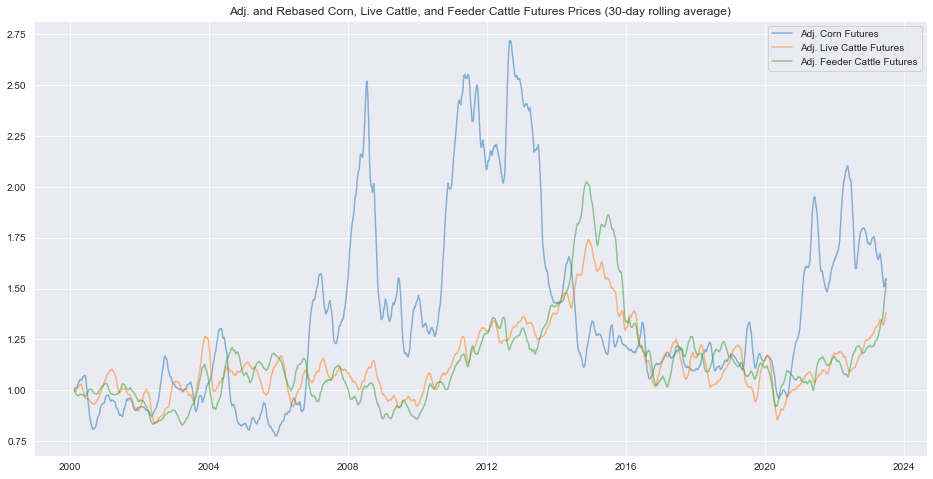

In [28]:
src.lineplot_mult_normalized(
    src.adjust_series_cpi(corn_futures.rolling(30).mean()),
    src.adjust_series_cpi(live_cattle_futures.rolling(30).mean()),
    src.adjust_series_cpi(feeder_cattle_futures.rolling(30).mean()),    
    'Adj. Corn Futures',
    'Adj. Live Cattle Futures',
    'Adj. Feeder Cattle Futures',
    title="Adj. and Rebased Corn, Live Cattle, and Feeder Cattle Futures Prices (30-day rolling average)",
    )

In [18]:
round(corn_futures.corr(live_cattle_futures),2)

0.61

- Corn has a positive correlation with live cattle on a daily basis
- However visually seems like whenever corn price crashes, cattle prices rally
    - Feeder rally makes sense, as more of the feedlot cost budget can go towards the this other input cost
    - However, a rally in live cattle doesn't make sense

In [21]:
round(corn_futures.corr(feeder_cattle_futures),2)

0.48

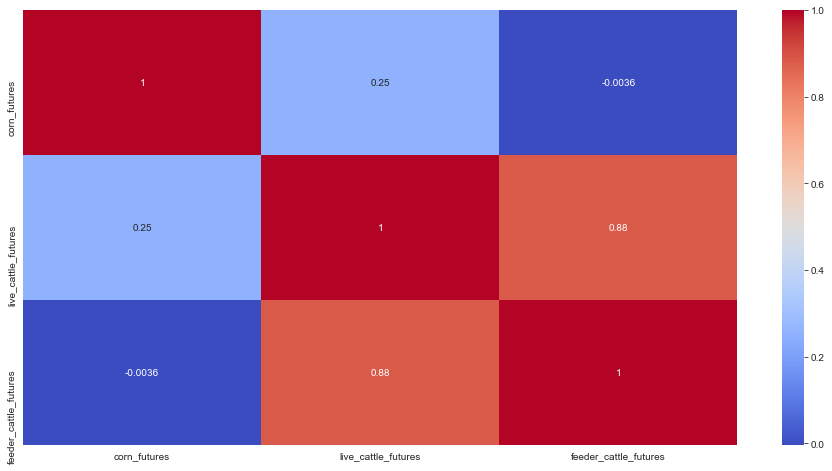

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([
    src.adjust_series_cpi(corn_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(live_cattle_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(feeder_cattle_futures).resample('Y').mean().pct_change()
    ], axis=1)

df.columns = ['corn_futures', 'live_cattle_futures', 'feeder_cattle_futures']

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

- On a yearly basis:
    - live and feeder cattle highly correlated
    - live and corn have a weak correlation
    - feeder and corn have barely any correlation

No handles with labels found to put in legend.


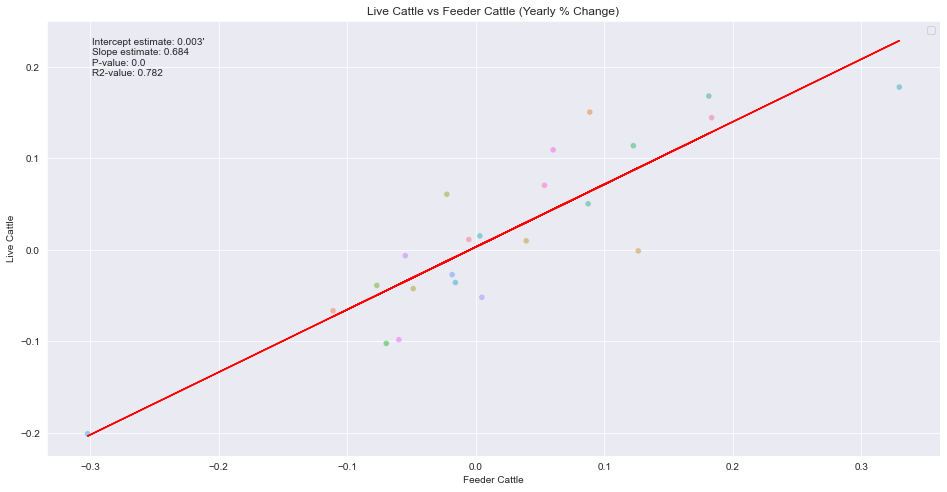

In [28]:
src.scatterplot(
    src.adjust_series_cpi(live_cattle_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(feeder_cattle_futures).resample('Y').mean().pct_change(),
    'Live Cattle',
    'Feeder Cattle',
    title='Live Cattle vs Feeder Cattle (Yearly % Change)',
    reg=True
)

No handles with labels found to put in legend.


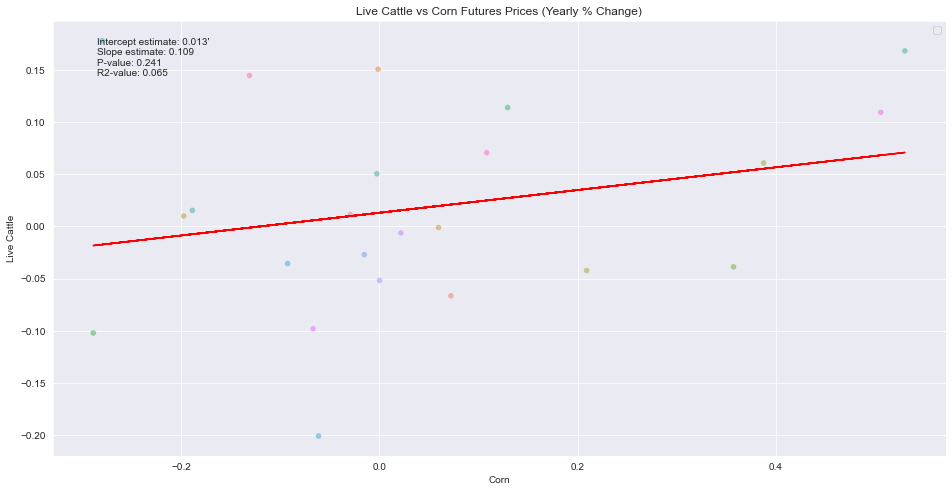

In [26]:
src.scatterplot(
    src.adjust_series_cpi(live_cattle_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(corn_futures).resample('Y').mean().pct_change(),
    'Live Cattle',
    'Corn',
    title='Live Cattle vs Corn Futures Prices (Yearly % Change)',
    reg=True
)

No handles with labels found to put in legend.


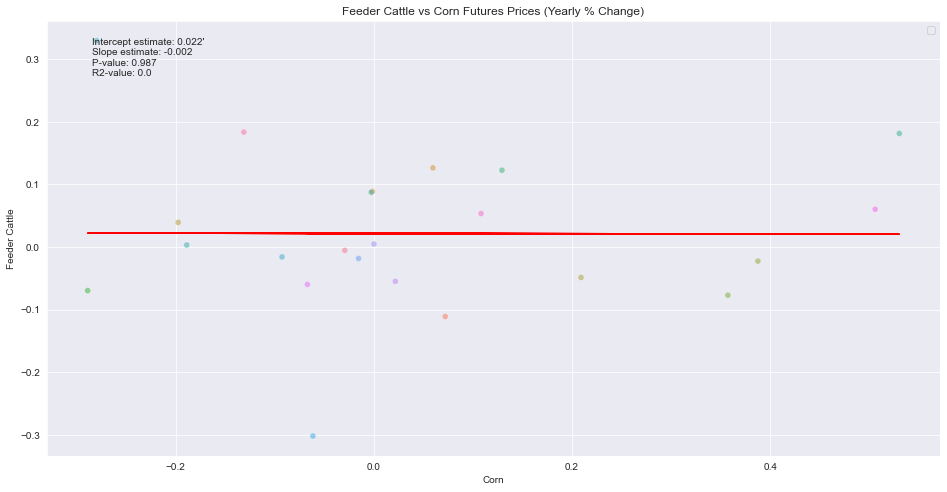

In [29]:
src.scatterplot(
    src.adjust_series_cpi(feeder_cattle_futures).resample('Y').mean().pct_change(),
    src.adjust_series_cpi(corn_futures).resample('Y').mean().pct_change(),
    'Feeder Cattle',
    'Corn',
    title='Feeder Cattle vs Corn Futures Prices (Yearly % Change)',
    reg=True
)

In [36]:
import statsmodels.api as sm


tmp = {'Y': 'Yearly', 'M': 'Monthly', 'D': 'Daily'}

for freq in ['Y', 'M', 'D']:
        
    print(f'\n\nRegression Results for {tmp[freq]} Data\n\n')
    df = pd.concat([
        src.adjust_series_cpi(live_cattle_futures).resample(freq).mean().pct_change(),
        src.adjust_series_cpi(feeder_cattle_futures).resample(freq).mean().pct_change(),
        src.adjust_series_cpi(corn_futures).resample(freq).mean().pct_change()
        ],
        keys=['live_cattle_futures_pct_chg', 'feeder_cattle_futures_pct_chg', 'corn_futures_pct_chg'],
        axis=1
    )
    df = df.dropna()

    model = sm.OLS(df.iloc[:,0], sm.add_constant(df.iloc[:,1:])).fit()

    print(model.summary())

    print('\n\n')




Regression Results for Yearly Data


                                 OLS Regression Results                                
Dep. Variable:     live_cattle_futures_pct_chg   R-squared:                       0.848
Model:                                     OLS   Adj. R-squared:                  0.833
Method:                          Least Squares   F-statistic:                     55.95
Date:                         Fri, 15 Sep 2023   Prob (F-statistic):           6.43e-09
Time:                                 20:47:32   Log-Likelihood:                 43.318
No. Observations:                           23   AIC:                            -80.64
Df Residuals:                               20   BIC:                            -77.23
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                                    coef    std err          t      P>|t|      [0

- Yearly regression: most of live cattle price is explained by feeder and corn (r-squared 0.848)
    - Feeder coefficient is 0.68, corn's is 0.11
- Monthly regression: majority of variation in live cattle price is not explained (r-squared drops to 0.355)
    - However coefficients still remain similar at 0.64 and 0.09 respectively
- Daily regression: r-squared decreases slightly to 0.31
    - Coefficients for feeder and corn still remain similar at 0.59 and 0.07